In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [ ]:
labels = ['logo', 'ads']
img_size = 90
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            if img.endswith('png'):
              img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
              resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
              data.append([resized_arr, class_num])
    return np.array(data)

In [ ]:
!unzip ./drive/MyDrive/ipl-assets/upload.zip -d ./drive/MyDrive/ipl-assets/

Archive:  ./drive/MyDrive/ipl-assets/upload_ads.zip
replace ./drive/MyDrive/ipl-assets/test/ads/result437.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace ./drive/MyDrive/ipl-assets/test/ads/result437.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: ./drive/MyDrive/ipl-assets/test/ads/result437.png  
 extracting: ./drive/MyDrive/ipl-assets/test/ads/result438 (2).png  
  inflating: ./drive/MyDrive/ipl-assets/test/ads/result438 (3).png  
 extracting: ./drive/MyDrive/ipl-assets/test/ads/result438.png  
 extracting: ./drive/MyDrive/ipl-assets/test/ads/result439 (2).png  
  inflating: ./drive/MyDrive/ipl-assets/test/ads/result439 (3).png  
 extracting: ./drive/MyDrive/ipl-assets/test/ads/result439.png  
 extracting: ./drive/MyDrive/ipl-assets/test/ads/result440 (2).png  
 extracting: ./drive/MyDrive/ipl-assets/test/ads/result440 (3).png  
 extracting: ./drive/MyDrive/ipl-assets/test/ads/result440.png  
 extracting: ./drive/MyDrive/ipl-assets/test/ad

In [ ]:
train = get_data('./drive/MyDrive/ipl-assets/train')
val = get_data('./drive/MyDrive/ipl-assets/test')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(img_size,img_size,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(len(labels), activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 11, 11, 64)      

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


83/83 [==============================] - 32s 377ms/step - loss: 0.7086 - accuracy: 0.3674 - val_loss: 0.7125 - val_accuracy: 0.4030
Epoch 2/500
83/83 [==============================] - 31s 379ms/step - loss: 0.6868 - accuracy: 0.5080 - val_loss: 0.6944 - val_accuracy: 0.5394
Epoch 3/500
83/83 [==============================] - 32s 390ms/step - loss: 0.6679 - accuracy: 0.5424 - val_loss: 0.6779 - val_accuracy: 0.5394
Epoch 4/500
83/83 [==============================] - 33s 401ms/step - loss: 0.6520 - accuracy: 0.5534 - val_loss: 0.6619 - val_accuracy: 0.5394
Epoch 5/500
83/83 [==============================] - 33s 404ms/step - loss: 0.6368 - accuracy: 0.5530 - val_loss: 0.6453 - val_accuracy: 0.5409
Epoch 6/500
83/83 [==============================] - 33s 396ms/step - loss: 0.6239 - accuracy: 0.5481 - val_loss: 0.6280 - val_accuracy: 0.5409
Epoch 7/500
83/83 [==============================] - 32s 384ms/step - loss: 0.6088 - accuracy: 0.5610 - val_loss: 0.6090 - val_accuracy: 0.5409
Epoc

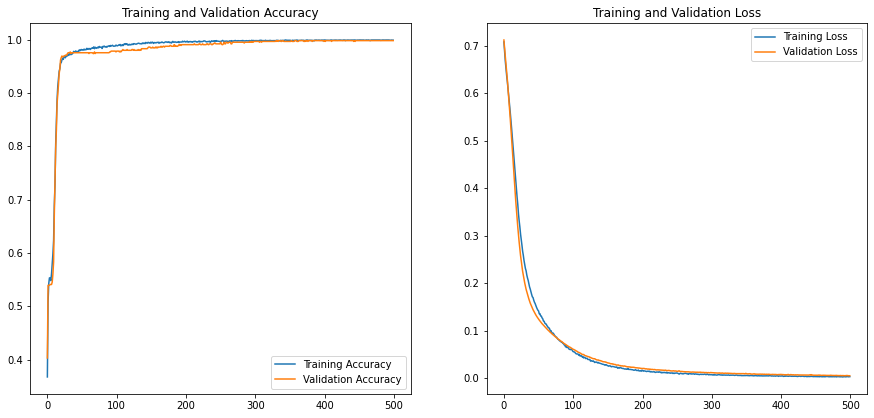

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('./drive/MyDrive/ipl_model')

INFO:tensorflow:Assets written to: ./drive/MyDrive/ipl_model/assets


In [ ]:
predictions = model.predict(x_val)
predictions

array([[9.9959022e-01, 4.0975062e-04],
       [9.8916608e-01, 1.0833941e-02],
       [9.9999869e-01, 1.2672790e-06],
       ...,
       [4.8263002e-05, 9.9995172e-01],
       [1.2402899e-04, 9.9987590e-01],
       [1.1937927e-05, 9.9998808e-01]], dtype=float32)